In [1]:
import cv2
import matplotlib.pyplot as plt
vid = cv2.VideoCapture(0)
vid

< cv2.VideoCapture 0000029A8D5616F0>

In [2]:
vid.isOpened()

True

In [3]:
k = vid.read()

In [4]:
type(k), len(k)

(tuple, 2)

In [5]:
flag,img = vid.read()

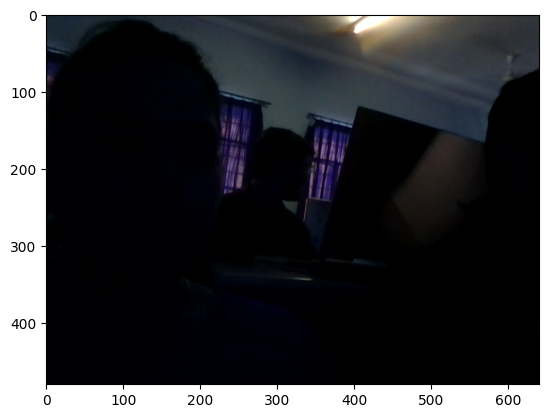

In [6]:
if flag:
    plt.imshow(img)

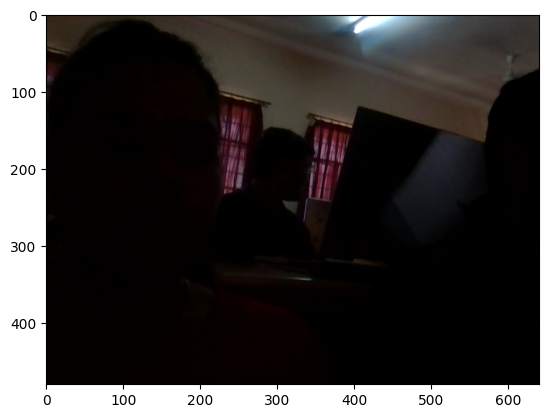

In [7]:
if flag:
    plt.imshow(img[:, : ,::-1])   #bgr is  flipped to rgb

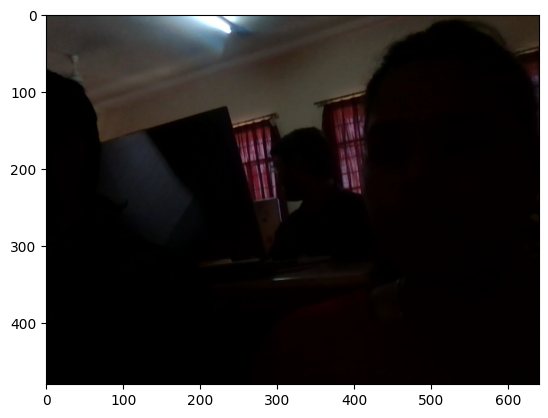

In [8]:
if flag:
    plt.imshow(img[:,::-1 ,::-1]) #rotated 180 degree
    

In [2]:
import cv2
import matplotlib.pyplot  as plt
fd= cv2.CascadeClassifier(                                                 #feature descriptor
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'  #github file
)
sd = cv2.CascadeClassifier(                                                 #feature descriptor
    cv2.data.haarcascades + 'haarcascade_smile.xml')

vid=cv2.VideoCapture(0)
vid.isOpened()
flag,img=vid.read()
from time import sleep

while True:
    flag,img=vid.read()
    if flag:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #to convert in gray

        th,img_binary=cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY) #to convert in binary

        # x1,y1,w,h = (200,400,300,400)
        faces= fd.detectMultiScale(img,1.1,5) #face detection
        # smile= sd.detectMultiScale(img)
        for x1,y1,w,h in faces:
            img_cropped = img[y1:y1+h, x1:x1+w , :] #crops the image

            cv2.rectangle(
                        img, 
                        pt1=[x1,y1], pt2= [x1+w, y1+h], 
                        color=(0,0,255),
                        thickness=10)  #higlights the particular part

            cv2.imshow('Preview',img)
        key=cv2.waitKey(1)
        if key==ord(' '): #will close the window when pressed spacebar
            break
    else :
        break
    sleep(0.1) #for delay
vid.release() #turns off the camera
cv2.destroyAllWindows()
#cv2.waitKey(1)    # only for Mac Os ,not for windows.